In [1]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = sns.load_dataset('car_crashes')
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [2]:
# Lets check for missing data before detecting outliers
df.isnull().sum()

total             0
speeding          0
alcohol           0
not_distracted    0
no_previous       0
ins_premium       0
ins_losses        0
abbrev            0
dtype: int64

There are no missing values

In [3]:
# Check sumamry statistics for alocohol
df['alcohol'].describe()

count    51.000000
mean      4.886784
std       1.729133
min       1.593000
25%       3.894000
50%       4.554000
75%       5.604000
max      10.038000
Name: alcohol, dtype: float64

There could be outliers after the IQR (after 75th percentile)

In [4]:
# Check sumamry statistics for speeding
df['speeding'].describe()

count    51.000000
mean      4.998196
std       2.017747
min       1.792000
25%       3.766500
50%       4.608000
75%       6.439000
max       9.450000
Name: speeding, dtype: float64

In [5]:
# Outlier detection using LOF
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20)

df['lof'] = lof.fit_predict(df.drop('abbrev', axis=1))
df['negative_outlier_factor'] = lof.negative_outlier_factor_

df[df['lof']==-1]

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev,lof,negative_outlier_factor
7,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE,-1,-1.523071
8,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC,-1,-1.895491
9,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL,-1,-1.561853
18,20.5,7.175,6.765,14.965,20.090,1281.55,194.78,LA,-1,-1.935874
30,11.2,1.792,3.136,9.632,8.736,1301.52,159.85,NJ,-1,-1.997898
32,12.3,3.936,3.567,10.824,9.840,1234.31,150.01,NY,-1,-1.758423
39,11.1,3.774,4.218,10.212,8.769,1148.99,148.58,RI,-1,-1.540334


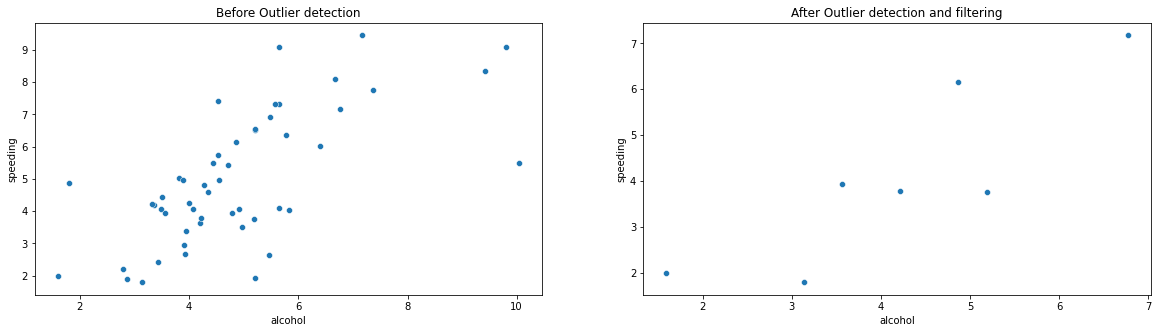

In [6]:
# Plot the data before and after outlier detection
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(20, 5))

# Before outlier detection
sns.scatterplot(x='alcohol', y='speeding', data=df, ax=ax1)
ax1.set_title('Before Outlier detection')

# After outlier detection and filtering
sns.scatterplot(x='alcohol', y='speeding', data=df[df['lof']==-1], ax=ax2)
ax2.set_title('After Outlier detection and filtering')

plt.show()

Inference:
1. As seen in plot 1, there is a presence of outliers. For few cases over speeding is related to high alcohol 
   consumption which might have led to car crash.
2. In plot 2, we have detected and filtered those outliers 